In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.misc as smp
from PIL import Image
from numba import jit
from timeit import default_timer as timer
import random

In [5]:
resolution = (1920,1080)
J_c = (-0.743643887037151,0.131825904205330)
J_z = 68227450827.50151


@jit
def Mandelbrot(x, y, max_iterations):
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iterations):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >=4:
            return i
    
    return max_iterations

@jit
def render(centre_x, centre_y, zoom, max_iter, rendergrid):
    xmin = centre_x - (3.5/(2*zoom))
    xmax = centre_x + (3.5/(2*zoom))
    ymin = centre_y - (2/(2*zoom))
    ymax = centre_y + (2/(2*zoom))

    pixel_width = (xmax-xmin)/resolution[0]
    pixel_height = (ymax-ymin)/resolution[1]
    
    for i in range(resolution[0]):
        real = xmin + i*pixel_width
        for j in range(resolution[1]):
            imaginary = ymin + j*pixel_height
            colour = Mandelbrot(real,imaginary, max_iter)
            rendergrid[j,i] = colour

In [7]:
#renderbox(J_c, J_z)
iter_array = []
for point in tqdm(picture):
    iterations = Mandelbrot(point[0], point[1], 1000000)
    iter_array.append(iterations)
    
rendergrid = np.zeros((resolution[1], resolution[0]), dtype = np.uint32)
start = timer()   
render(J_c[0], J_c[1], J_z, 10000, rendergrid)
dt = timer() - start
print ("Mandelbrot created in %f s" % dt)
imshow(rendergrid)
show()

NameError: name 'picture' is not defined

In [36]:
#Greyscale Image
Gy = np.array(iter_array)
Greyscale = np.reshape(Gy,(resolution[1],resolution[0]))
print(Greyscale.shape)

#Coloured Image with  colourmap
cm = plt.get_cmap('prism')
coloured = cm(Greyscale)

img = Image.fromarray( Greyscale)       # Create a PIL image
img.show()

(720, 1280)


In [ ]:
Image.fromarray((coloured[:, :, :3] * 255).astype(np.uint8)).save('test.png')

In [18]:
#Save image
out = img.convert("L")
out.save('CoolRBG_1080.png')

100%|███████████████████████████████████████████████████████████████████████| 921600/921600 [00:09<00:00, 94031.85it/s]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|███████████████████████████████████████████████████████████████████████| 921600/921600 [00:10<00:00, 86057.58it/s]


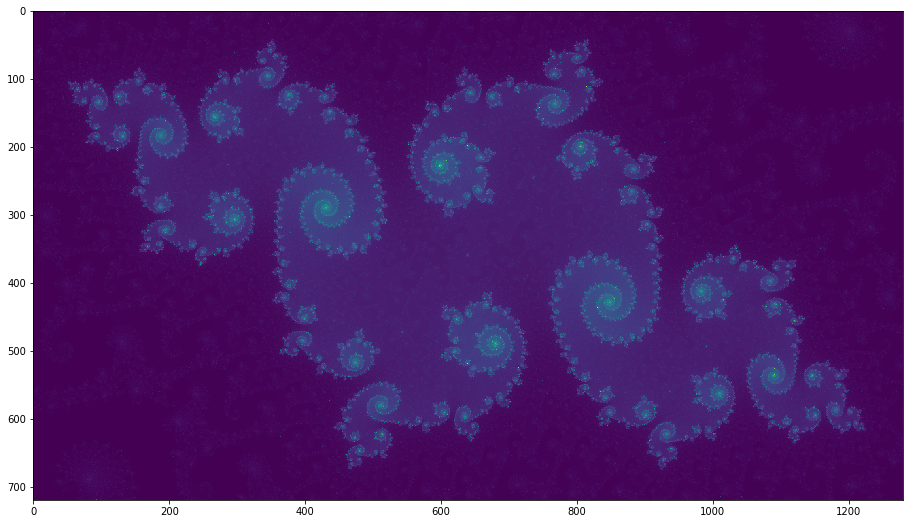

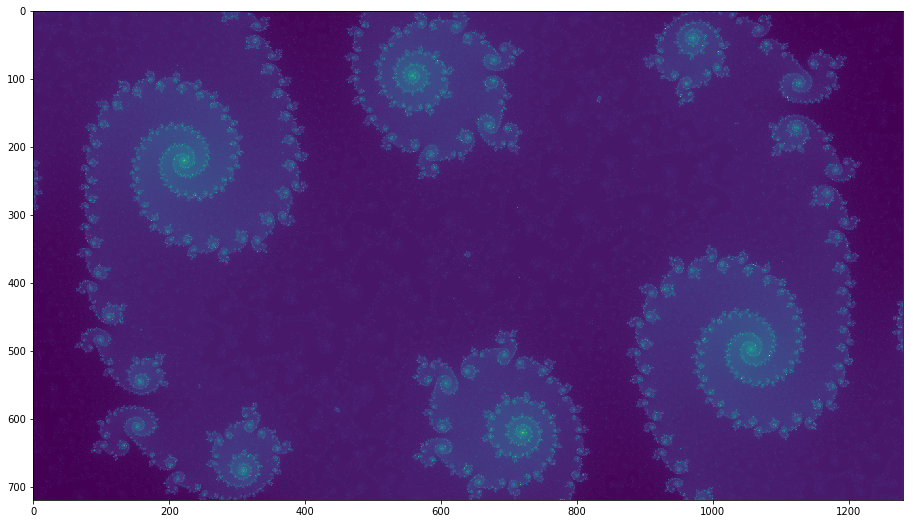

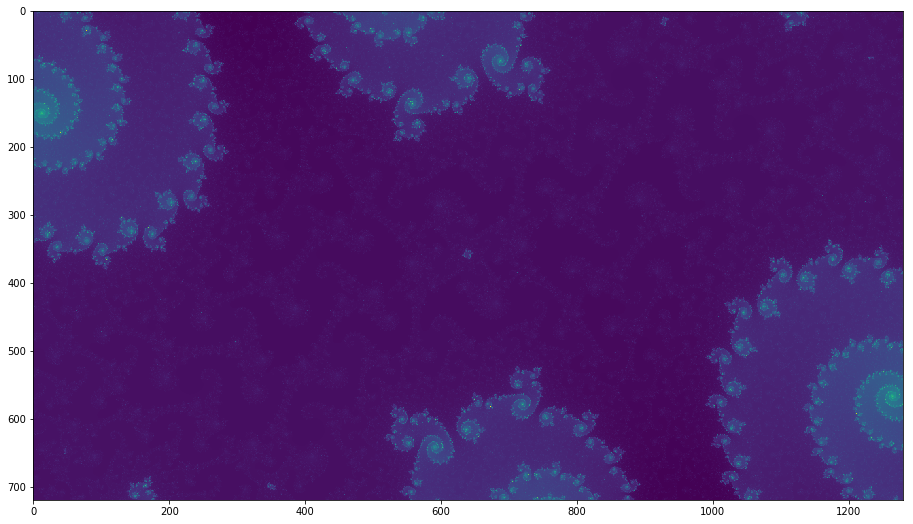

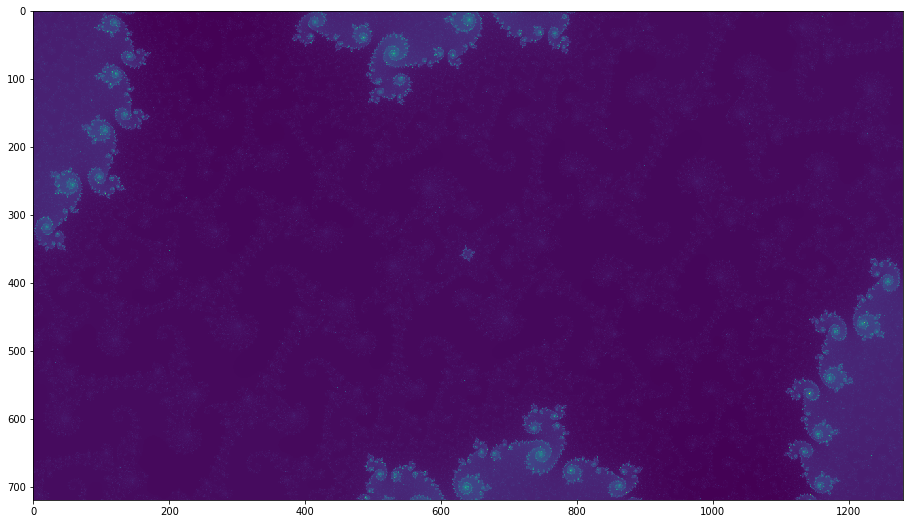

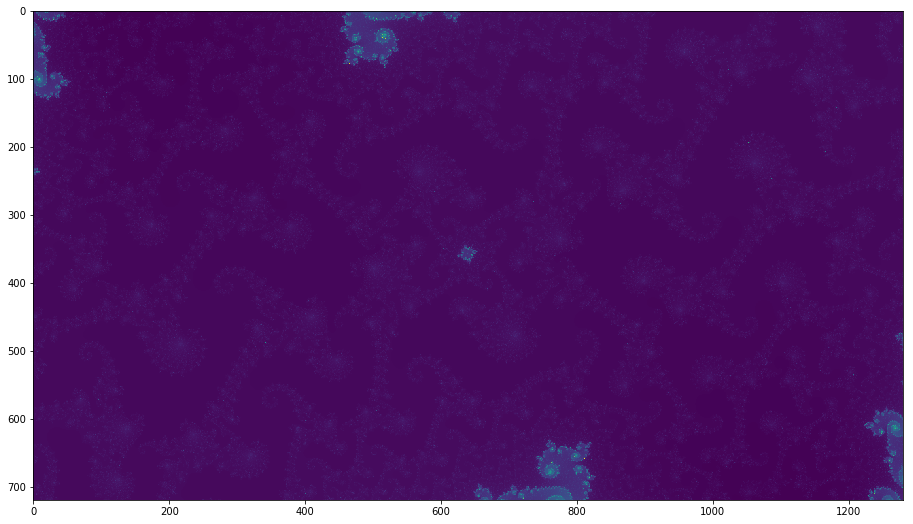

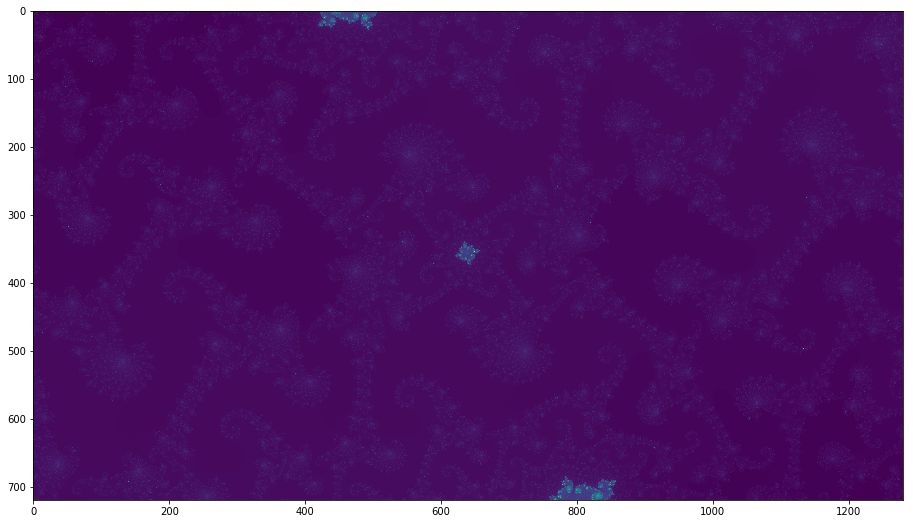

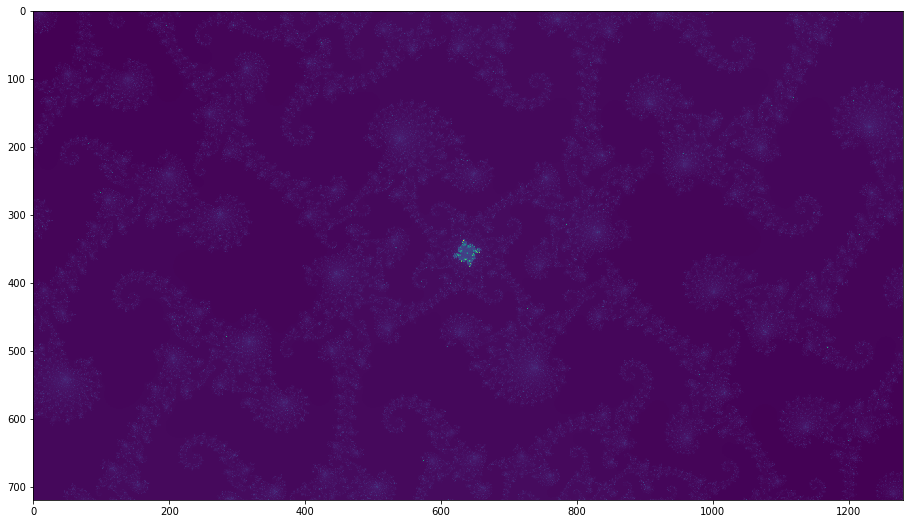

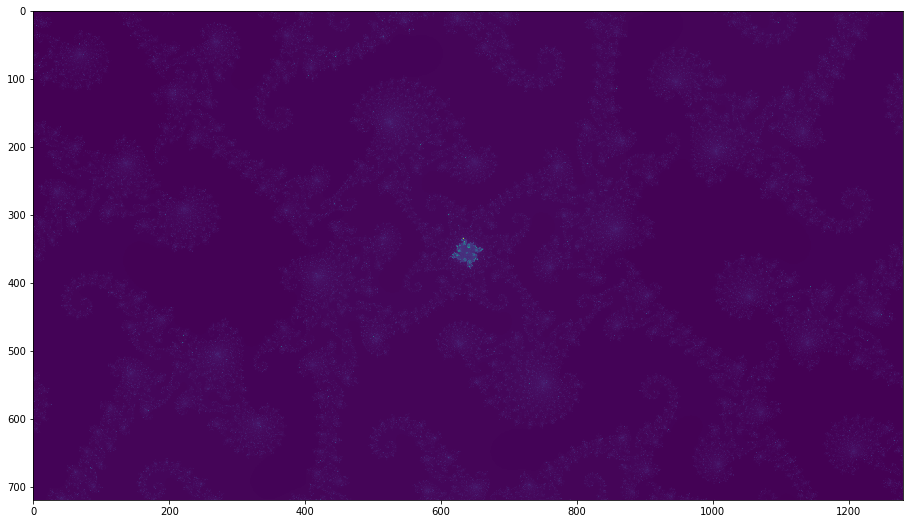

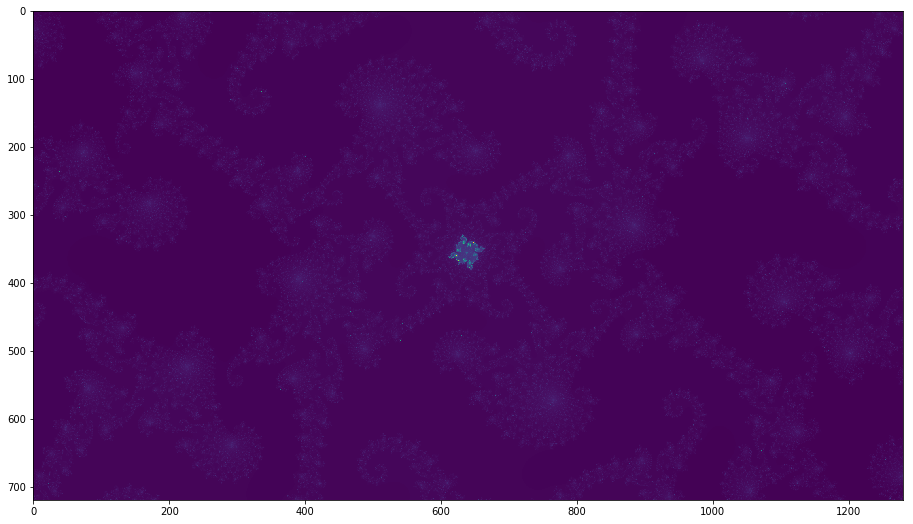

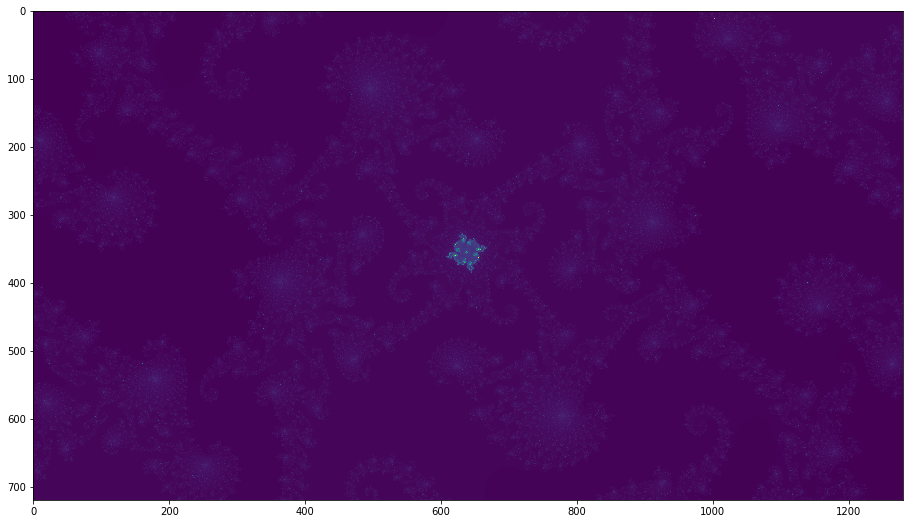

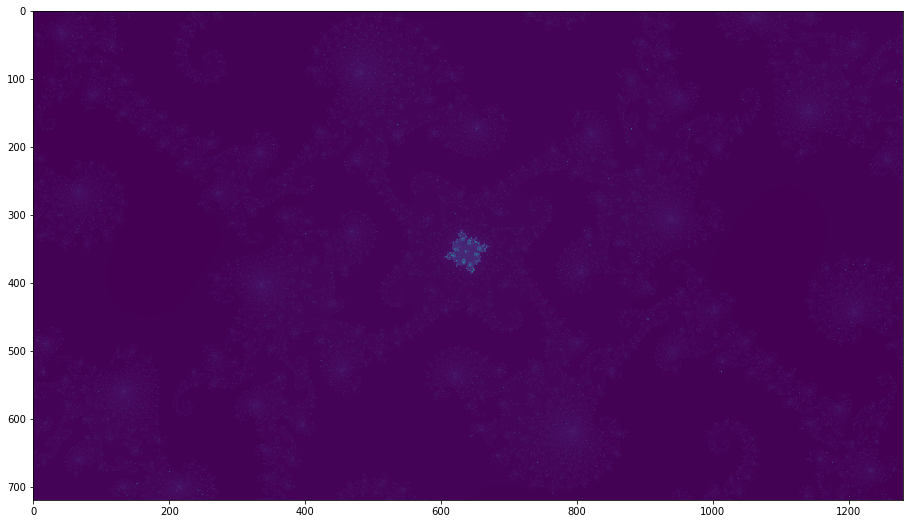

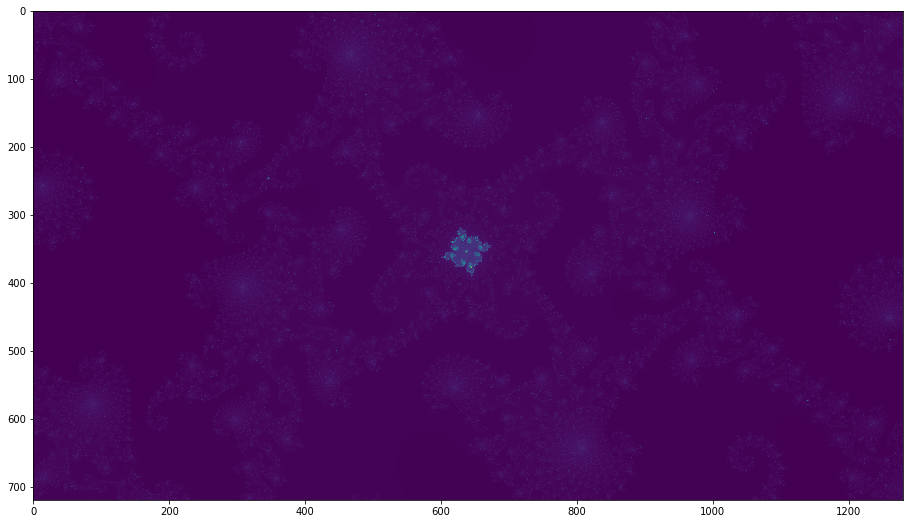

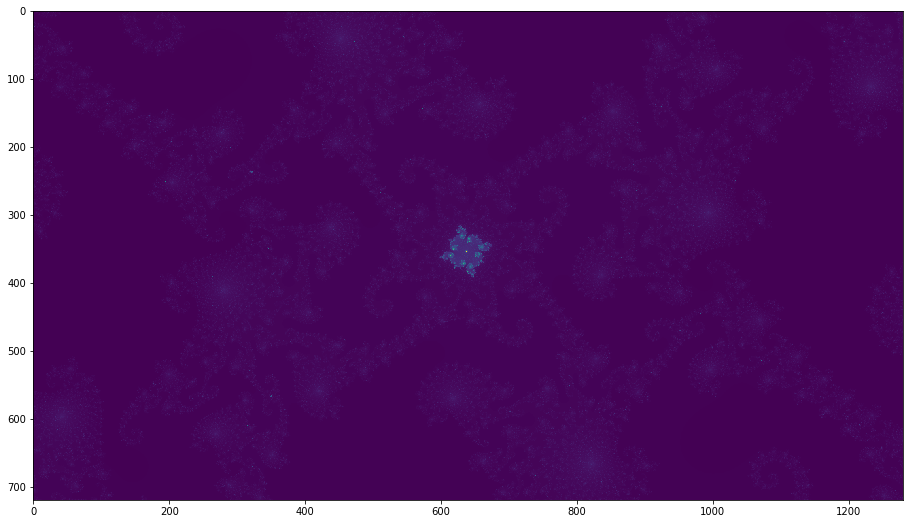

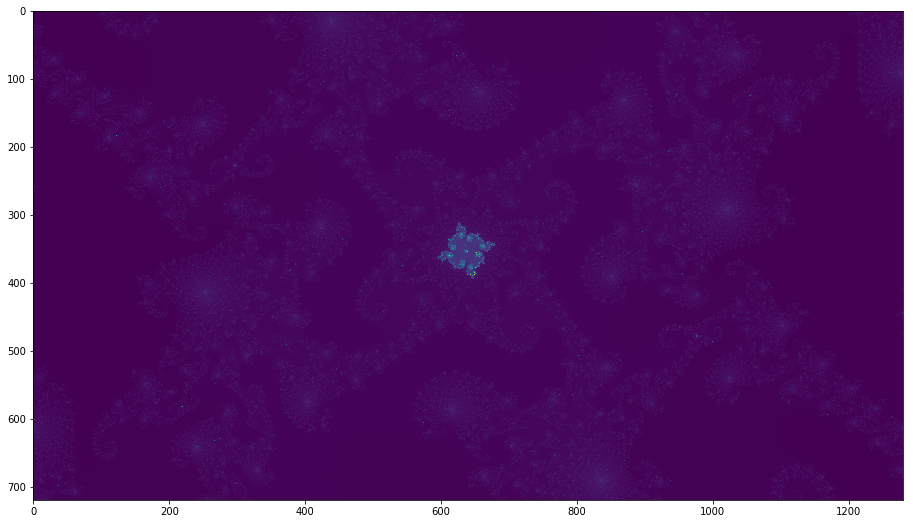

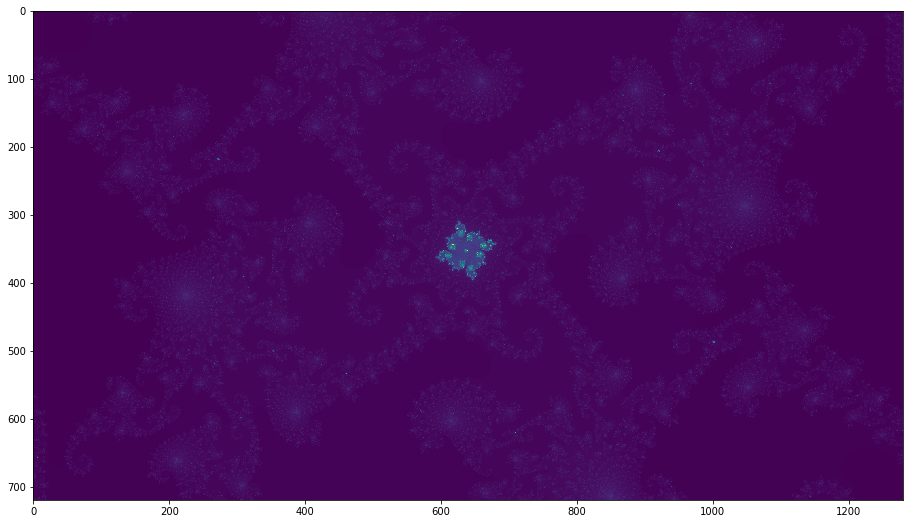

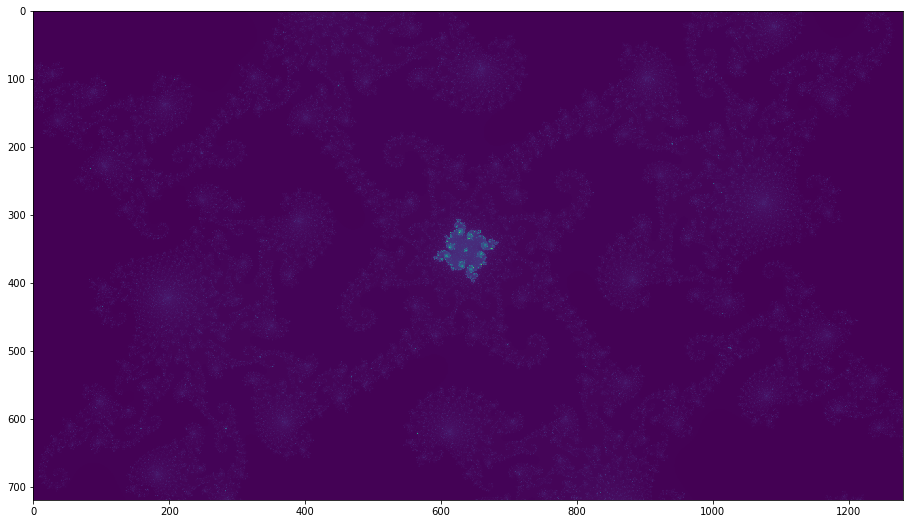

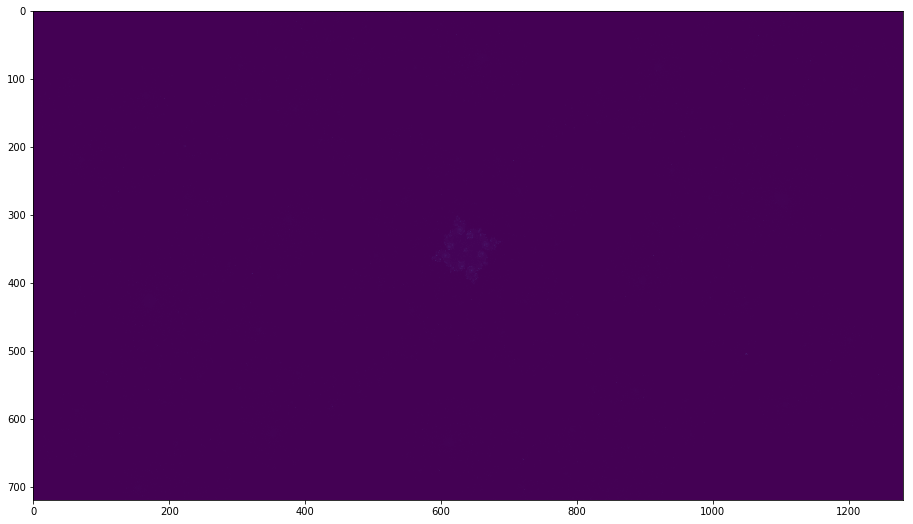

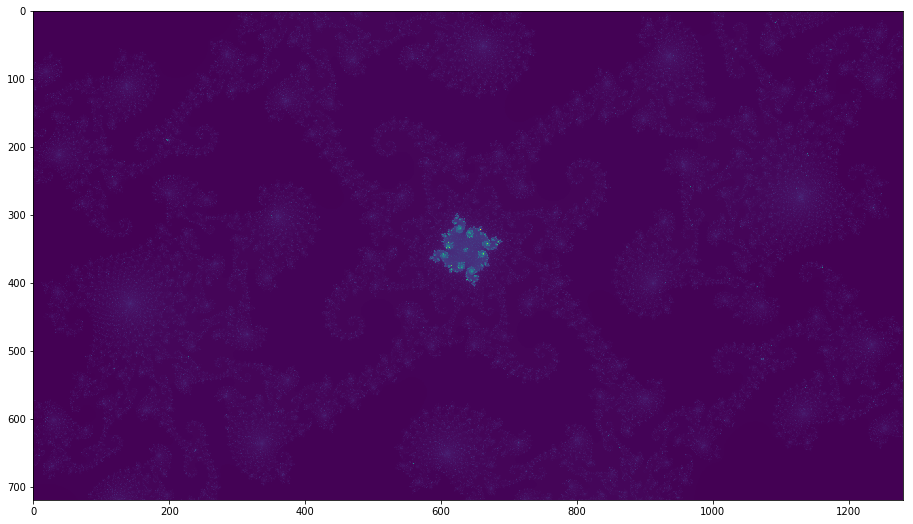

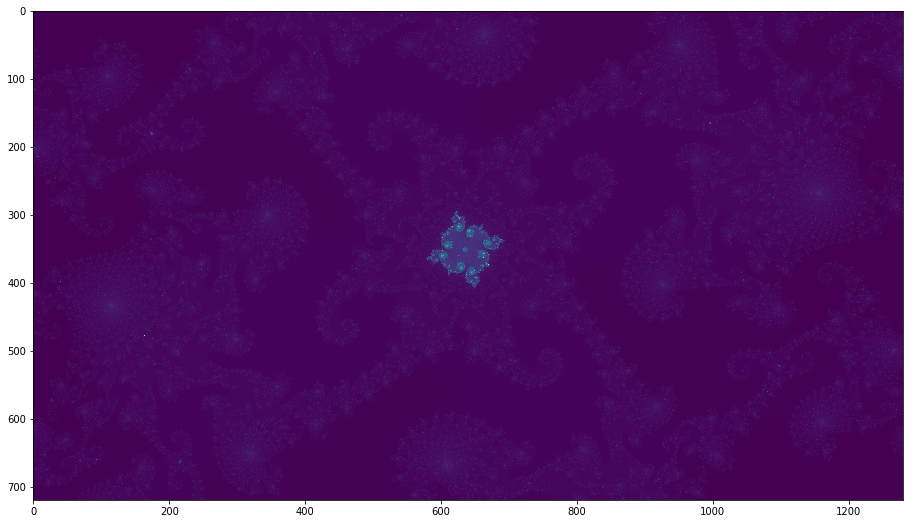

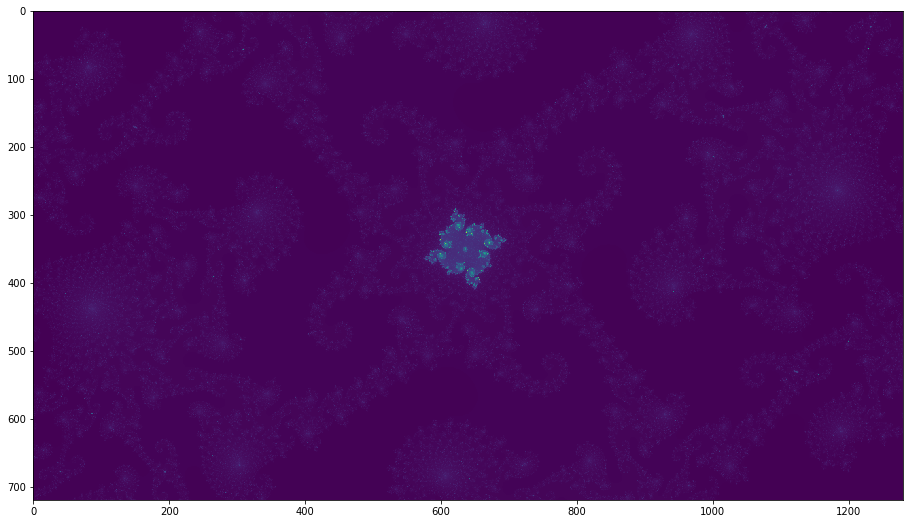

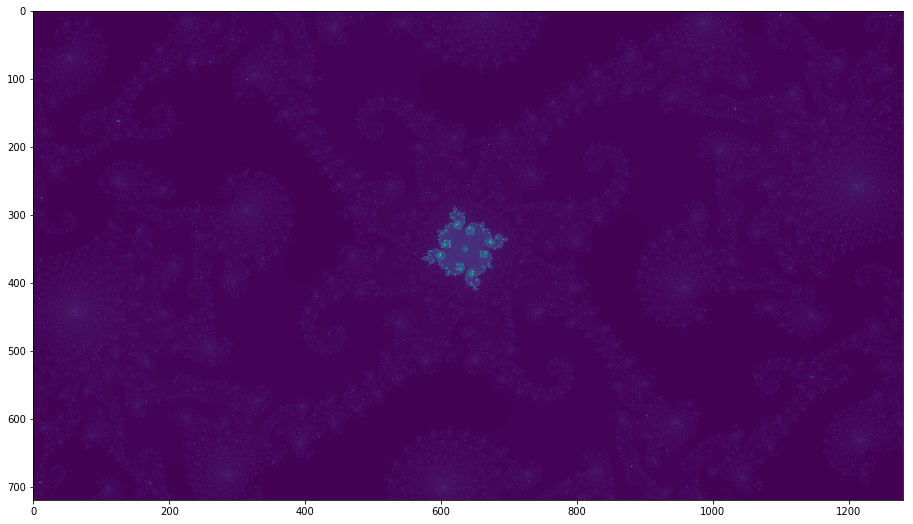

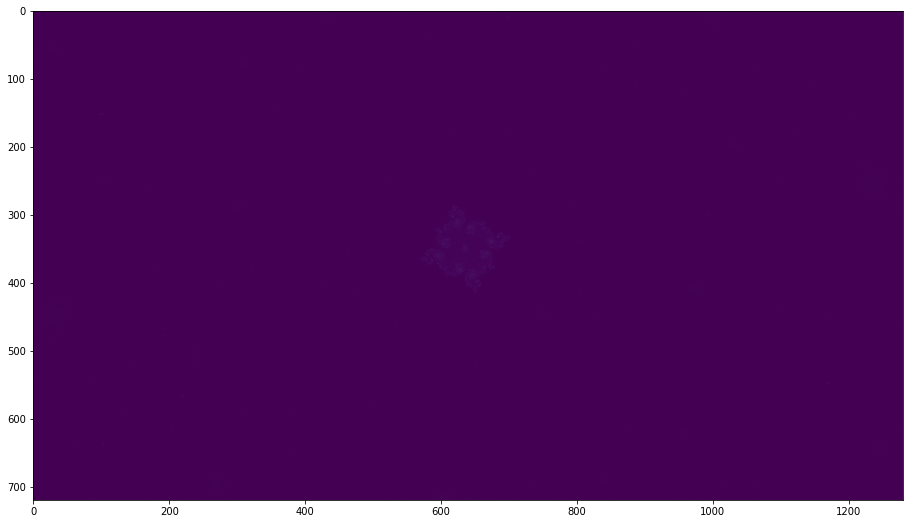

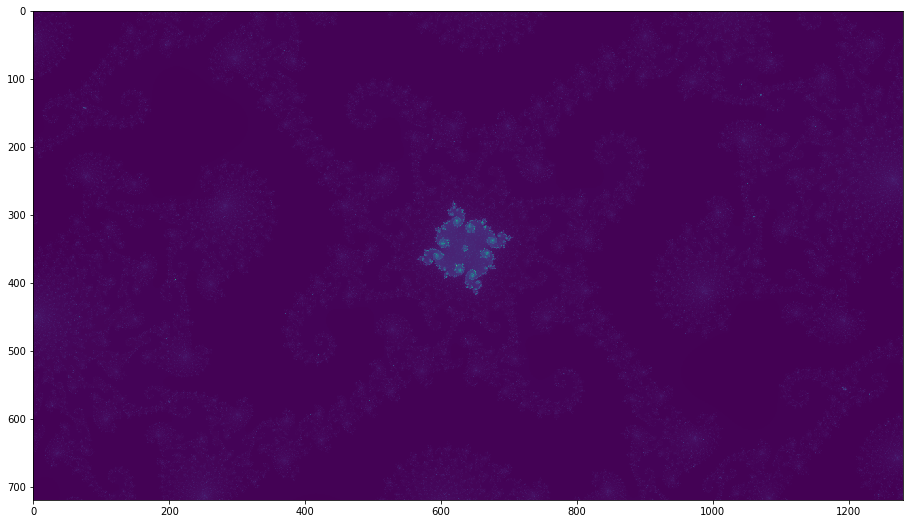

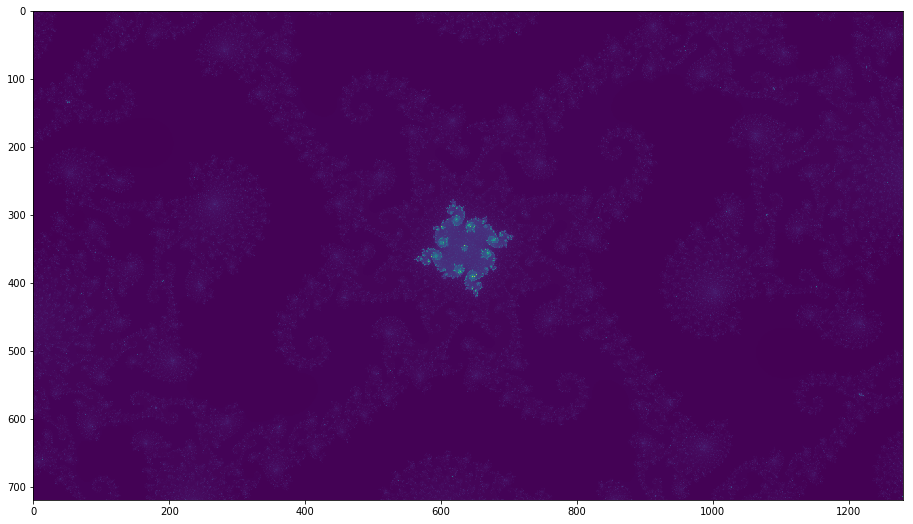

In [43]:
for frame in range(24):
    iter_array = []
    picture = renderbox((-0.743643887037151,0.131825904205330),(68227450827.50151*(1+(frame))))
    for point in tqdm(picture):
        iterations = Mandelbrot(point[0], point[1], 100000)
        iter_array.append(iterations)
    Gy = np.array(iter_array)
    Greyscale = np.reshape(Gy,(resolution[1],resolution[0]))
    plt.figure(figsize = (16,9))
    plt.imshow(Greyscale, interpolation='nearest')
    plt.savefig('matplot'+str(frame))

In [ ]:
xmin = centre[0] - (3.5/(2*zoom))
xmax = centre[0] + (3.5/(2*zoom))

ymin = centre[1] - (2/(2*zoom))
ymax = centre[1] + (2/(2*zoom))

print(xmin, xmax, ymin, ymax)

In [ ]:
iter_array = []
coordinates = renderbox((-0.743643887037151,0.131825904205330),1)
for point in tqdm(coordinates):
    iterations = Mandelbrot(point[0], point[1], 1000)
    iter_array.append(iterations)
plt.figure(figsize = (16,9))
plt.imshow(Greyscale, interpolation='nearest')
plt.savefig('matplot'+str(frame))

In [ ]:
plt.figure(figsize = (16,9))
plt.imshow(Greyscale, interpolation='nearest')
plt.savefig('matplot'+str(frame))

In [39]:
Mandelbrot(J_c[0], J_c[1], 1000000)

3085

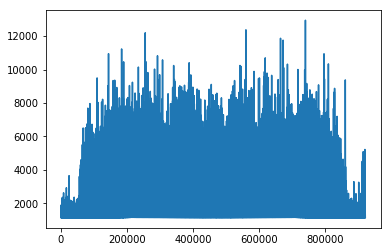

In [40]:
plt.plot(iter_array)

In [55]:
start = timer()
picture = renderbox(J_c,J_z) 
dt = timer() - start
print(dt)

0.30521269999985634
